# Data/Library Import

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn as skt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Mount Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

# Import data from Drive
test_data = (pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Data/test.csv'))
training1_data = (pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Data/training1.csv'))
training2_data = (pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Data/training2.csv'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Set all NaN values to -1
test = test_data.fillna(-1).to_numpy()
training1 = training1_data.fillna(-1).to_numpy()
training2 = training2_data.fillna(-1).to_numpy()

# Retrieve and Concatenate Data
Split training data into a training set and a validation set

In [3]:
# Collect only training data
training1_features = training1[:,:-2]
training2_features = training2[:,:-2]
all_features = np.concatenate((training1_features, training2_features))
# Get only the training labels but as int as they are in float64
label1 = training1[:,-2].astype(int)
label2 = training2[:,-2].astype(int)
all_labels = np.concatenate((label1, label2))

## Data Split
Split the training data with an 80/20 split. 20% of the data and the representative labels will be used for validation. 80% for the training

In [4]:
features_train, features_valid, labels_train, labels_valid = train_test_split(all_features, all_labels, test_size=0.2, shuffle=True)

# Data Preprocessing

In [30]:
# A standard scalar used to set mean to 0 and variance to 1
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(features_train)

# Normalise the data sets
train_norm = std_scaler.transform(features_train)
valid_norm = std_scaler.transform(features_valid)
test_norm = std_scaler.transform(test)

# Select the most important pieces of data from all data sets
feature_selector = SelectFromModel(RandomForestRegressor(n_estimators=50,max_depth=10), max_features=100).fit(train_norm, labels_train)
train_imp = feature_selector.transform(train_norm)
valid_imp = feature_selector.transform(valid_norm)
test_imp = feature_selector.transform(test_norm)


# Model Creation
Creating and training the models


In [84]:
svc_rbf_scale = SVC(kernel='rbf', gamma=0.0005)
svc_rbf_scale.fit(train_imp, labels_train)

SVC(gamma=0.0005)

In [85]:
svc_rbf_auto = SVC(kernel='rbf', gamma='auto')
svc_rbf_auto.fit(train_imp, labels_train)

SVC(gamma='auto')

In [86]:
svc_lin = SVC(kernel='linear')
svc_lin.fit(train_imp, labels_train)

SVC(kernel='linear')

In [87]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(train_imp, labels_train)

SVC(kernel='poly')

## Accuracy
testing the models

In [88]:
eval_rbf_scale = svc_rbf_scale.score(valid_imp, labels_valid)

In [89]:
eval_rbf_auto = svc_rbf_auto.score(valid_imp, labels_valid)

In [90]:
eval_lin = svc_lin.score(valid_imp, labels_valid)

In [91]:
eval_poly = svc_poly.score(valid_imp, labels_valid)

In [92]:
accuracy = [eval_rbf_scale, eval_lin, eval_poly]

In [98]:
# Accuracy of the model
print("The accuracy of all data with 0.0005 RBF kernel: " + eval_rbf_scale.astype(str))
print("The accuracy of all data with auto RBF kernel: " + eval_rbf_auto.astype(str))
print("The accuracy of all data with linear kernel: " + eval_lin.astype(str))
print("The accuracy of all data with poly kernel: " + eval_poly.astype(str))

The accuracy of all data with 0.0005 RBF kernel: 0.725
The accuracy of all data with auto RBF kernel: 0.7220588235294118
The accuracy of all data with linear kernel: 0.7044117647058824
The accuracy of all data with poly kernel: 0.7088235294117647


In [96]:
ticks = ["RBF (scaled)", "Linear", "Poly"]

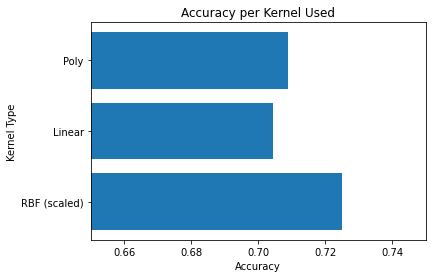

In [97]:
plt.barh(ticks,accuracy)
plt.xlim(0.65, 0.75)
plt.title("Accuracy per Kernel Used")
plt.xlabel("Accuracy")
plt.ylabel("Kernel Type")
plt.show()

# Test Prediction

In [99]:
predictions = svc_rbf_scale.predict(test_imp)

# Prediction Saving

In [100]:
pd.DataFrame(predictions).to_csv('predictions.csv')